In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

from scipy import stats

In [2]:
RS = 42

In [3]:
#/kaggle/input/miami-housing-dataset/miami-housing.csv
df=pd.read_csv('miami-housing.csv')
df.rename(columns = {'age': 'AGE', 'avno60plus': 'AVNO_60_PLUS', 'month_sold': 'MONTH_SOLD', 'structure_quality': 'STRUCTURE_QUALITY'}, inplace = True)

In [4]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,AGE,AVNO_60_PLUS,MONTH_SOLD,STRUCTURE_QUALITY
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [5]:
df.shape

(13932, 17)

- Since 'LATITUDE','LONGITUDE','PARCELNO' are unique for each records we can drop them.

In [6]:
df.drop(['LATITUDE', 'LONGITUDE','PARCELNO'], axis = 1, inplace = True)

#### Train test split

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('SALE_PRC', axis = 1)
Y = df['SALE_PRC']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = RS, test_size = 0.20)

In [8]:
Y.shape

(13932,)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11145, 13), (2787, 13), (11145,), (2787,))

In [10]:
df = X_train.join(y_train, how = 'inner')
df.sort_index(axis = 0, inplace = True)

#### Information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LND_SQFOOT         11145 non-null  int64  
 1   TOT_LVG_AREA       11145 non-null  int64  
 2   SPEC_FEAT_VAL      11145 non-null  int64  
 3   RAIL_DIST          11145 non-null  float64
 4   OCEAN_DIST         11145 non-null  float64
 5   WATER_DIST         11145 non-null  float64
 6   CNTR_DIST          11145 non-null  float64
 7   SUBCNTR_DI         11145 non-null  float64
 8   HWY_DIST           11145 non-null  float64
 9   AGE                11145 non-null  int64  
 10  AVNO_60_PLUS       11145 non-null  int64  
 11  MONTH_SOLD         11145 non-null  int64  
 12  STRUCTURE_QUALITY  11145 non-null  int64  
 13  SALE_PRC           11145 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 1.3 MB


- There are no missing values in the dataset.

- All the features in the dataset are numerical.

#### Checking for duplicate entries

In [12]:
Duplicate = df[df.duplicated(keep='first')]
print("Duplicate Entries :", Duplicate.shape)

Duplicate Entries : (0, 14)


- There are no duplicate entries in the dataset.

## EXPLORATORY DATA ANALYSIS

#### Discrete features

In [13]:
discrete_feature = [feature for feature in df.columns if len(df[feature].unique())<25]
print('Discrete variables count: {}'.format(len(discrete_feature)))

Discrete variables count: 3


In [14]:
discrete_feature

['AVNO_60_PLUS', 'MONTH_SOLD', 'STRUCTURE_QUALITY']

#### Discrete feature analysis

D:\Cobraaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


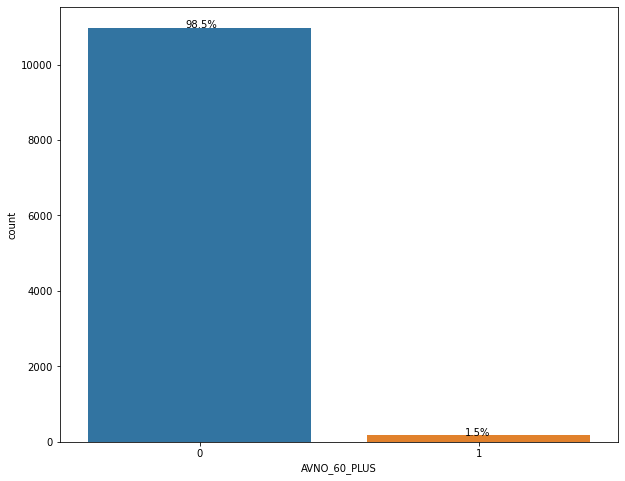

D:\Cobraaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


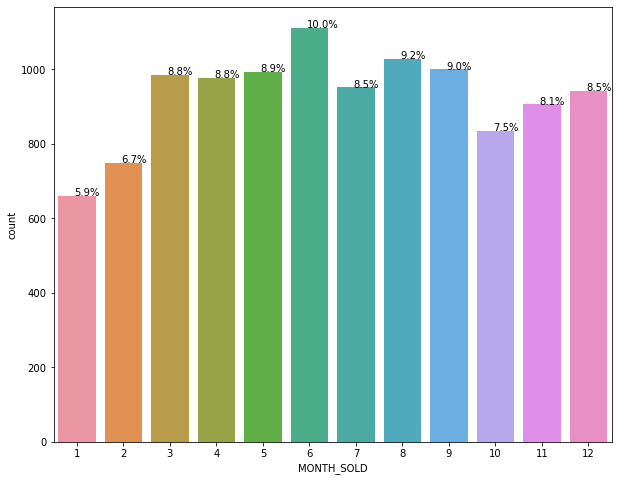

D:\Cobraaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


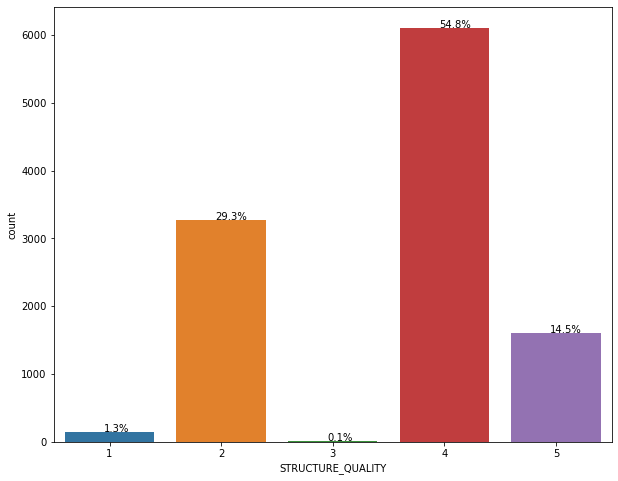

In [15]:
for feature in discrete_feature:
    plt.figure(figsize=(10,8))
    plot=sns.countplot(df[feature])
    
    total = len(df[feature])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 10)
    
    plt.show() 

- AVNO_60_PLUS is dominated by class 0
- Month 6 has the maximum number of sales, Almost all months have equal percentage of sales.
- 54.8% of houses have Structure quality rating of 5

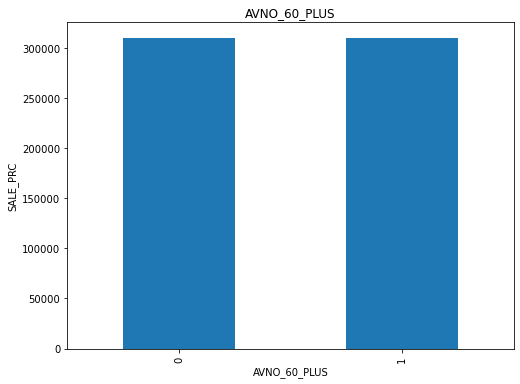

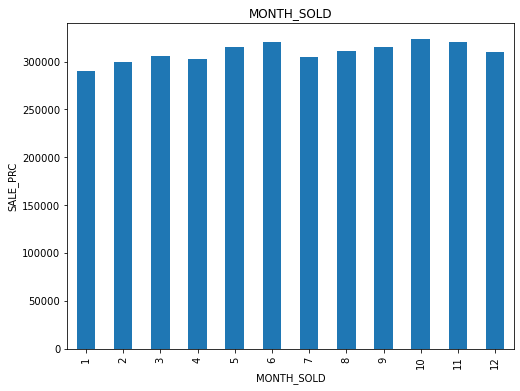

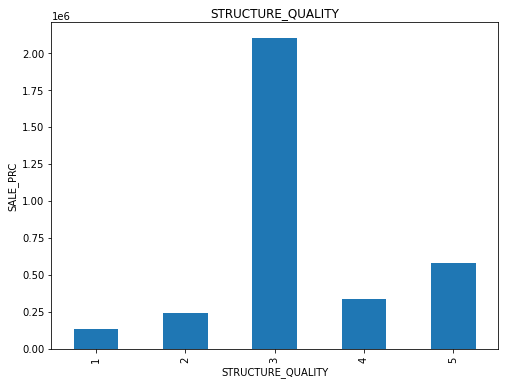

In [16]:
for feature in discrete_feature:
    plt.figure(figsize=(8,6))
    data = df.copy()
    data.groupby(feature)['SALE_PRC'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SALE_PRC')
    plt.title(feature)
    plt.show()

- AVNO_60_PLUS and MONTH_SOLD seems like they do not add any value in predicting the SALE_PRC, because all of its classes median values are almost equal, Let's keep an eye on these two features and test for its significance on SALE_PRC by using some statistical tests(FEATURE SELECTION).

- class 3 of STRUCTURE_QUALITY has the highest SALE_PRC.

#### Continuous feature analysis

In [17]:
continuous_feature = [feature for feature in df.columns if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 11


In [18]:
continuous_feature

['LND_SQFOOT',
 'TOT_LVG_AREA',
 'SPEC_FEAT_VAL',
 'RAIL_DIST',
 'OCEAN_DIST',
 'WATER_DIST',
 'CNTR_DIST',
 'SUBCNTR_DI',
 'HWY_DIST',
 'AGE',
 'SALE_PRC']

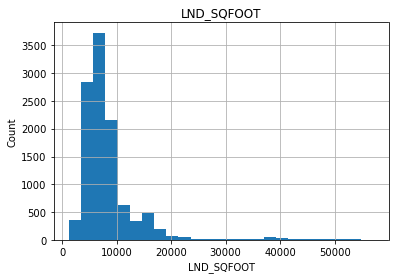

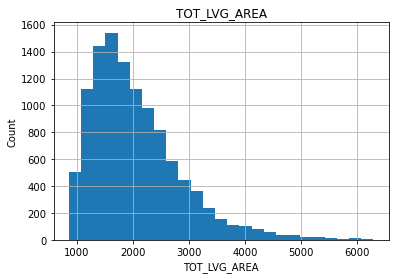

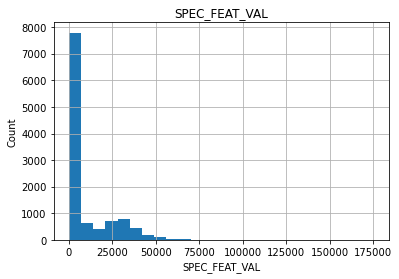

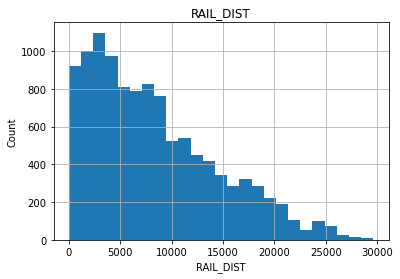

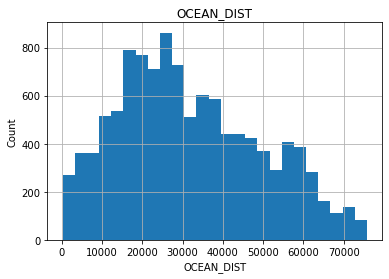

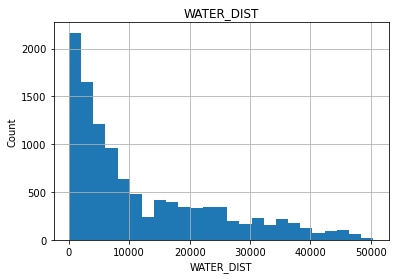

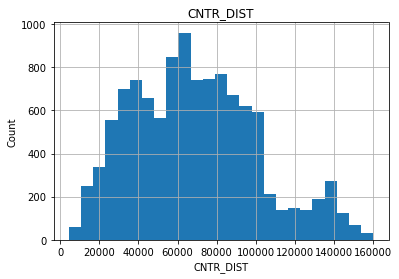

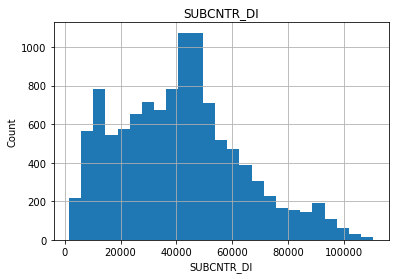

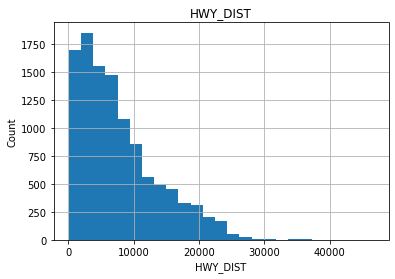

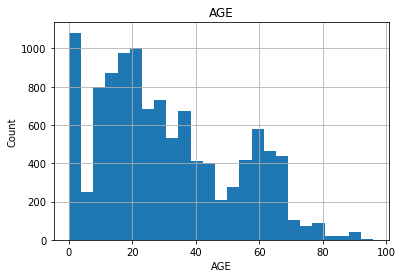

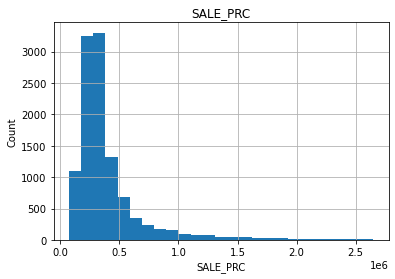

In [19]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

- This dataset has skewed independent/ input features. We can prove this by some statistical tests.

In [20]:
from scipy.stats import shapiro

for feature in continuous_feature:
    data = df.copy()
    DataToTest = data[feature]
    stat, p = shapiro(DataToTest)
    print(feature)
    print('stat = %.2f, p = %.30f' % (stat, p))
    
    if p > 0.05:
        print('Normal distribution')
        print()
    else:
        print('Not a normal distribution')
        print()

LND_SQFOOT
stat = 0.62, p = 0.000000000000000000000000000000
Not a normal distribution

TOT_LVG_AREA
stat = 0.91, p = 0.000000000000000000000000000000
Not a normal distribution

SPEC_FEAT_VAL
stat = 0.70, p = 0.000000000000000000000000000000
Not a normal distribution

RAIL_DIST
stat = 0.93, p = 0.000000000000000000000000000000
Not a normal distribution

OCEAN_DIST
stat = 0.97, p = 0.000000000000000000000000000000
Not a normal distribution

WATER_DIST
stat = 0.85, p = 0.000000000000000000000000000000
Not a normal distribution

CNTR_DIST
stat = 0.98, p = 0.000000000000000000000000000000
Not a normal distribution

SUBCNTR_DI
stat = 0.97, p = 0.000000000000000000000000000000
Not a normal distribution

HWY_DIST
stat = 0.91, p = 0.000000000000000000000000000000
Not a normal distribution

AGE
stat = 0.95, p = 0.000000000000000000000000000000
Not a normal distribution

SALE_PRC
stat = 0.66, p = 0.000000000000000000000000000000
Not a normal distribution



D:\Cobraaa\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- None of the features are normally distributed. We need to make these features normally distributed before building the model by applying some Tranformations(FEATURE ENGINEERING)

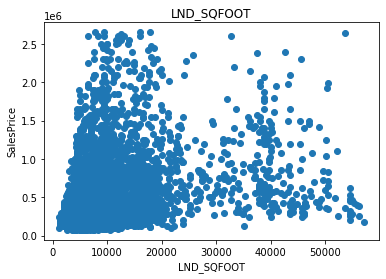

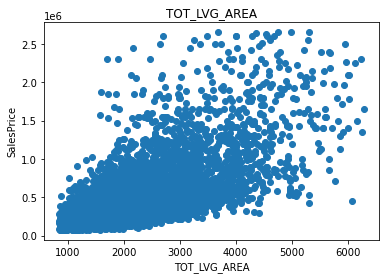

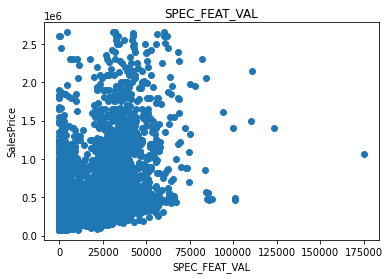

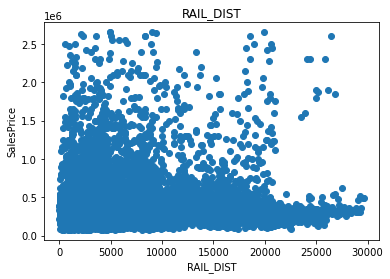

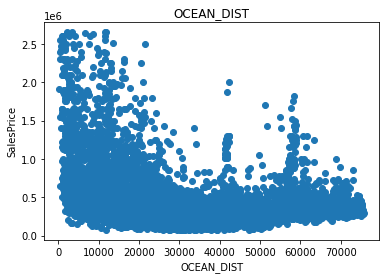

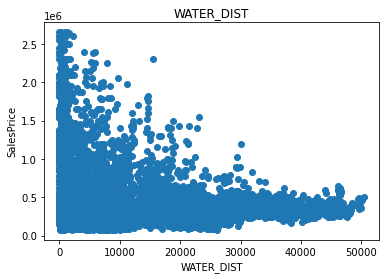

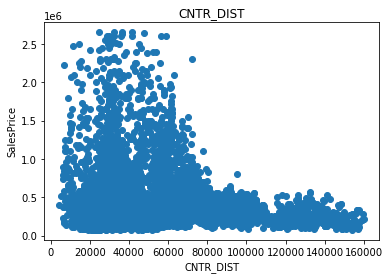

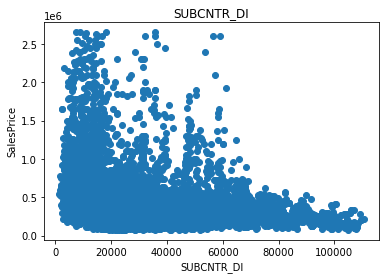

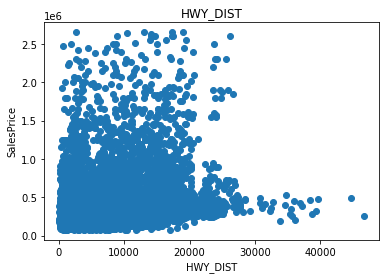

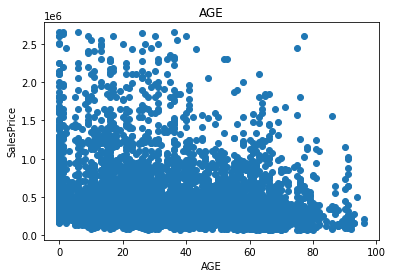

In [21]:
for feature in continuous_feature:
    
    data = df.copy()
    
    if feature != 'SALE_PRC':
        data[feature]=data[feature]    
        plt.scatter(data[feature],data['SALE_PRC'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

We cannot see any monotonic relationship between the independent and dependent features, this maybe beacause of skewness or outliers.

So now let us check for outliers in independent features.

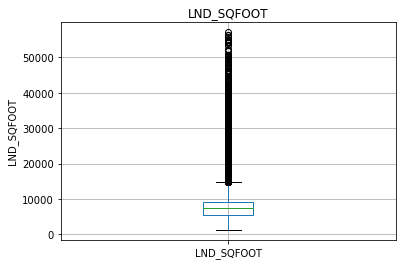

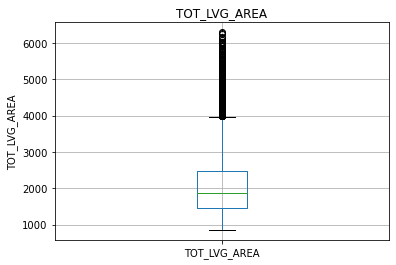

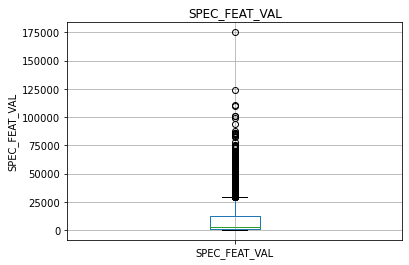

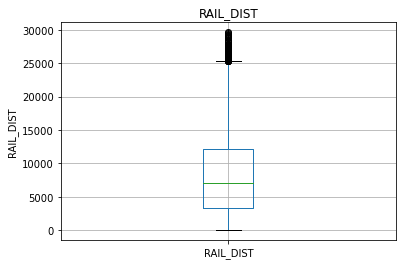

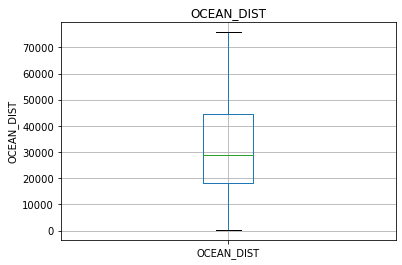

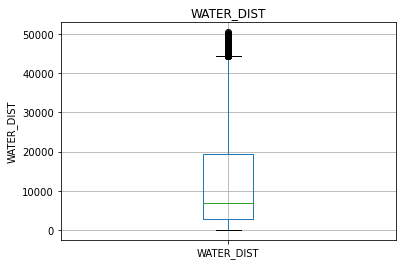

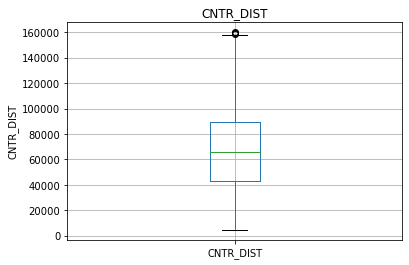

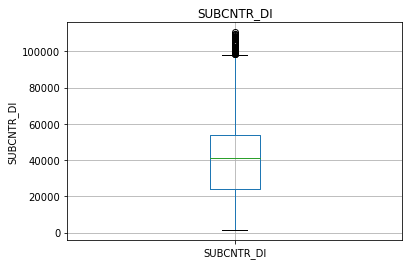

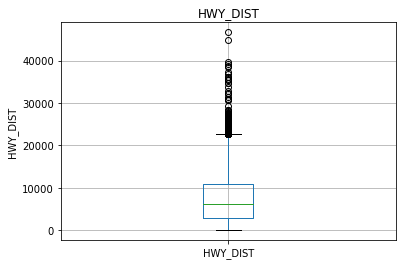

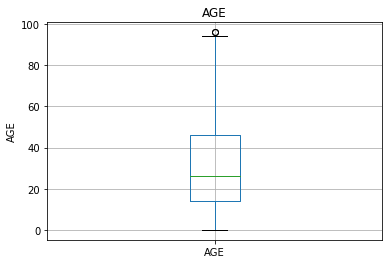

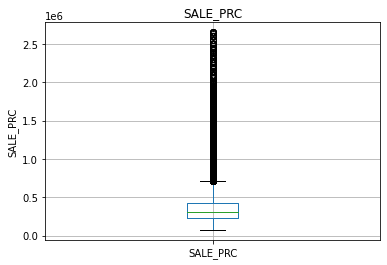

In [22]:
for feature in continuous_feature:
    
    data = df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

As we can see the dataset has large number of outliers in them.

Outliers can be handled using some outlier handling techniques orelse we can use Machine learning models that are robust to outliers.

In [23]:
def IQR_outliers(data,limit=1.5):
    numColumns = data.select_dtypes(include=np.number).columns.tolist(); # extract list of numeric columns
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    outliers=((data[numColumns] < (Q1 - limit*IQR)) | (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers 

In [24]:
outliers = IQR_outliers(df)
outliers

LND_SQFOOT            9.869897
TOT_LVG_AREA          3.176312
SPEC_FEAT_VAL        12.319426
RAIL_DIST             0.915209
OCEAN_DIST            0.000000
WATER_DIST            1.633019
CNTR_DIST             0.035891
SUBCNTR_DI            0.915209
HWY_DIST              2.189323
AGE                   0.017945
AVNO_60_PLUS          1.525348
MONTH_SOLD            0.000000
STRUCTURE_QUALITY     0.000000
SALE_PRC              9.762225
dtype: float64

'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'WATER_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'AVNO_60_PLUS' - These features have high percentage of outliers.

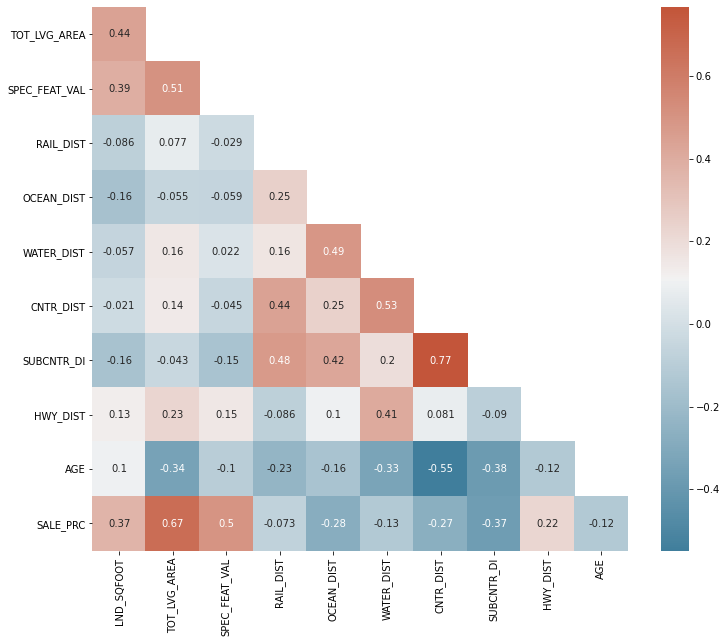

In [25]:
corr = df[continuous_feature].corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.yticks(rotation=0)
plt.show()

***OBSERVATIONS***

- Dataset has no missing values.
- AVNO_60_PLUS and MONTH_SOLD seems like they do not add any value in predicting the SALE_PRC(let us conform this through feature selection techniques)
- None of the input/independent features are normally distributed and some features have outliers in them.
- No multicollinearity

## FEATURE ENGINEERING

***Feature scaling***

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

## FEATURE SELECTION

***Checking for constant, quasi constant features***

In [27]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train_scaled)

VarianceThreshold(threshold=0.01)

In [28]:
constant_filter.get_support().sum()

13

There are no constant and quasi constant features in the dataset.

***Checking for duplicate features***

In [29]:
X_train_T = X_train_scaled.T
X_train_T.duplicated().sum()

0

There are no duplicate features in the dataset

***Checking for multicollinearity***

<BarContainer object of 7 artists>

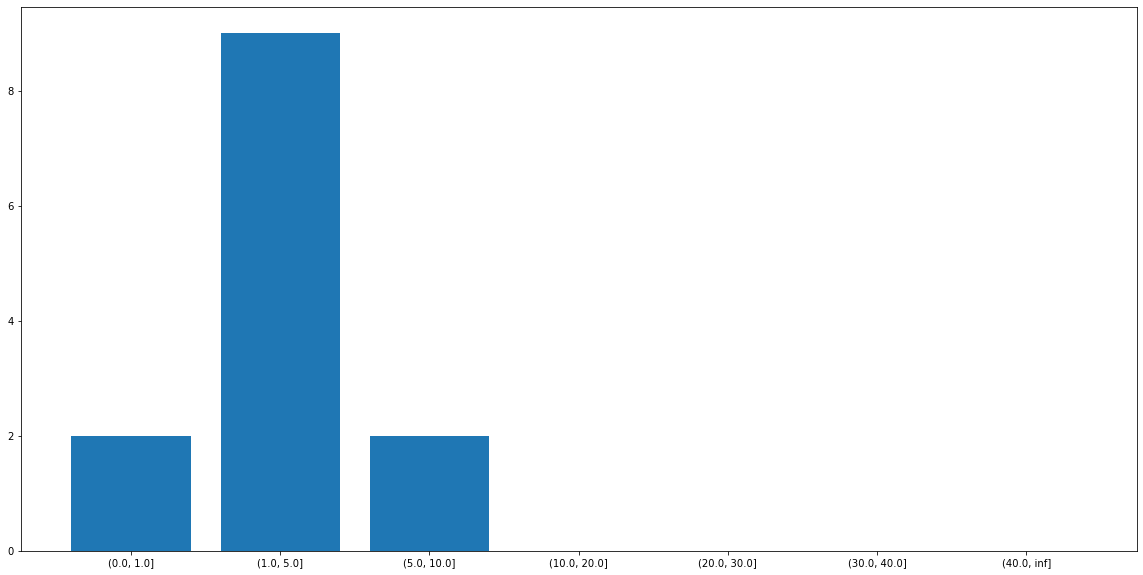

In [30]:
df = X_train_scaled.copy()
vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
df = pd.cut(vif.round(1),[0,1,5,10,20,30,40,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

plt.subplots(figsize=(20, 10))
plt.bar(x=df.index, height=df)

There are few multicollinear features. Generally VIF>10 is considered as high, None of the features have VIF value greater than 10

***Feature selection by Recursive Feature Elimination***

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

sel = RFE(RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1))
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False,  True])

In [32]:
features = X_train_scaled.columns[sel.get_support()]
features

Index(['TOT_LVG_AREA', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI',
       'STRUCTURE_QUALITY'],
      dtype='object')

In [33]:
X_train_sel = pd.DataFrame(sel.transform(X_train_scaled), columns = features)

In [34]:
X_train_sel.shape, y_train.shape

((11145, 6), (11145,))

In [35]:
X_train_final, X_validation, y_train_final, y_validation = train_test_split(X_train_sel, y_train,  random_state = RS, test_size = 0.10)

In [36]:
X_train_final.shape, y_train_final.shape, X_validation.shape, y_validation.shape

((10030, 6), (10030,), (1115, 6), (1115,))

In [37]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
#     rmsle = sqrt(metrics.mean_squared_log_error(y_test, pred))  # Root mean squared log error (since the numbers are huge)
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
#               'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics
    
    r2_cv = cv['test_r2'].mean()                                     # mean r squared value
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
#     rmsle_cv = np.mean([sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, r2_cv, rmse_cv, duration, pred  # return all the metrics along with predictions

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=RS)   
br = BaggingRegressor(random_state=RS)
rf = RandomForestRegressor(random_state=RS, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
gb = GradientBoostingRegressor(random_state=RS, n_estimators=100)
xgb = XGBRegressor(random_state=RS, n_estimators=100)
cb = CatBoostRegressor(random_state=RS, n_estimators=100)
lbr = LGBMRegressor(random_state=RS, n_estimators=100)


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lr, dt, br, rf, gb, xgb, cb, lbr], ['Linear Regression', 'Decision Tree',
                                               'Bagging Ensemble', 'Random Forest', 'Gradient Boost Ensemble',
                                               'XGB Regressor', 'CatBoostRegressor', 'LGBMRegressor']):
    result[name] = fit_n_print(model,X_train_final, X_validation,y_train_final, y_validation)  

Learning rate set to 0.383164
0:	learn: 235353.3505600	total: 154ms	remaining: 15.2s
1:	learn: 189846.4848521	total: 162ms	remaining: 7.93s
2:	learn: 162167.8002168	total: 170ms	remaining: 5.5s
3:	learn: 144647.2326716	total: 178ms	remaining: 4.27s
4:	learn: 134149.0871581	total: 187ms	remaining: 3.56s
5:	learn: 126975.8562749	total: 196ms	remaining: 3.06s
6:	learn: 122719.5778547	total: 204ms	remaining: 2.71s
7:	learn: 119827.3749333	total: 214ms	remaining: 2.46s
8:	learn: 117956.3075842	total: 222ms	remaining: 2.25s
9:	learn: 115760.2210660	total: 230ms	remaining: 2.07s
10:	learn: 114416.0197550	total: 238ms	remaining: 1.93s
11:	learn: 112584.9198436	total: 246ms	remaining: 1.8s
12:	learn: 110995.0335662	total: 253ms	remaining: 1.7s
13:	learn: 110201.6700367	total: 261ms	remaining: 1.6s
14:	learn: 109372.1086249	total: 269ms	remaining: 1.52s
15:	learn: 107715.1395893	total: 277ms	remaining: 1.45s
16:	learn: 107128.4957097	total: 285ms	remaining: 1.39s
17:	learn: 106192.7369936	total:

57:	learn: 82011.3022811	total: 363ms	remaining: 263ms
58:	learn: 81630.6899287	total: 369ms	remaining: 256ms
59:	learn: 81360.1875618	total: 375ms	remaining: 250ms
60:	learn: 81156.3265896	total: 381ms	remaining: 243ms
61:	learn: 80816.5958168	total: 387ms	remaining: 237ms
62:	learn: 80579.6182346	total: 393ms	remaining: 231ms
63:	learn: 80143.9121675	total: 398ms	remaining: 224ms
64:	learn: 79923.2357252	total: 404ms	remaining: 218ms
65:	learn: 79470.1167540	total: 410ms	remaining: 211ms
66:	learn: 79187.4100887	total: 417ms	remaining: 205ms
67:	learn: 78795.9808381	total: 423ms	remaining: 199ms
68:	learn: 78385.2898336	total: 429ms	remaining: 193ms
69:	learn: 78072.2538540	total: 435ms	remaining: 186ms
70:	learn: 77810.5705135	total: 441ms	remaining: 180ms
71:	learn: 77623.6799251	total: 447ms	remaining: 174ms
72:	learn: 77334.3490904	total: 453ms	remaining: 168ms
73:	learn: 76997.7301406	total: 459ms	remaining: 161ms
74:	learn: 76766.7221732	total: 465ms	remaining: 155ms
75:	learn:

26:	learn: 96830.8781775	total: 183ms	remaining: 495ms
27:	learn: 96239.1672318	total: 190ms	remaining: 487ms
28:	learn: 95722.9146094	total: 196ms	remaining: 480ms
29:	learn: 94767.4608250	total: 203ms	remaining: 473ms
30:	learn: 94439.5314017	total: 210ms	remaining: 467ms
31:	learn: 93571.9201875	total: 216ms	remaining: 459ms
32:	learn: 92862.8503257	total: 223ms	remaining: 453ms
33:	learn: 92462.2087522	total: 230ms	remaining: 446ms
34:	learn: 91713.4043666	total: 236ms	remaining: 438ms
35:	learn: 91159.2643683	total: 243ms	remaining: 431ms
36:	learn: 90887.6770276	total: 249ms	remaining: 424ms
37:	learn: 90684.5986886	total: 256ms	remaining: 418ms
38:	learn: 89906.9112167	total: 263ms	remaining: 411ms
39:	learn: 89660.9954085	total: 269ms	remaining: 404ms
40:	learn: 89116.5482458	total: 276ms	remaining: 397ms
41:	learn: 88614.5464731	total: 282ms	remaining: 390ms
42:	learn: 88192.4886793	total: 289ms	remaining: 383ms
43:	learn: 87803.2915814	total: 296ms	remaining: 376ms
44:	learn:

Learning rate set to 0.376839
0:	learn: 236724.4818916	total: 7.76ms	remaining: 768ms
1:	learn: 189933.4323784	total: 15ms	remaining: 736ms
2:	learn: 163658.4922495	total: 22.5ms	remaining: 727ms
3:	learn: 145688.6524502	total: 29.8ms	remaining: 716ms
4:	learn: 135560.1099504	total: 36.5ms	remaining: 694ms
5:	learn: 128509.0255722	total: 43.1ms	remaining: 676ms
6:	learn: 123997.3852426	total: 50ms	remaining: 665ms
7:	learn: 120906.5654683	total: 56.9ms	remaining: 654ms
8:	learn: 118359.0517322	total: 63.5ms	remaining: 642ms
9:	learn: 117009.8509450	total: 70ms	remaining: 630ms
10:	learn: 115582.3611717	total: 76.5ms	remaining: 619ms
11:	learn: 114667.7195310	total: 83.2ms	remaining: 610ms
12:	learn: 113404.9349296	total: 89.8ms	remaining: 601ms
13:	learn: 111807.1808722	total: 96.4ms	remaining: 592ms
14:	learn: 110418.3072582	total: 103ms	remaining: 584ms
15:	learn: 109432.5624367	total: 110ms	remaining: 576ms
16:	learn: 108985.6354814	total: 116ms	remaining: 567ms
17:	learn: 107153.05

60:	learn: 81129.0858135	total: 339ms	remaining: 217ms
61:	learn: 80757.4619418	total: 345ms	remaining: 212ms
62:	learn: 80383.1784051	total: 351ms	remaining: 206ms
63:	learn: 80063.7306521	total: 357ms	remaining: 201ms
64:	learn: 79689.8668403	total: 364ms	remaining: 196ms
65:	learn: 79180.6742750	total: 370ms	remaining: 191ms
66:	learn: 78849.0516527	total: 377ms	remaining: 186ms
67:	learn: 78628.9594534	total: 383ms	remaining: 180ms
68:	learn: 78184.9285409	total: 389ms	remaining: 175ms
69:	learn: 77996.2771409	total: 395ms	remaining: 169ms
70:	learn: 77838.9118933	total: 401ms	remaining: 164ms
71:	learn: 77499.8877230	total: 407ms	remaining: 158ms
72:	learn: 77228.9712508	total: 413ms	remaining: 153ms
73:	learn: 76990.2196642	total: 419ms	remaining: 147ms
74:	learn: 76882.8007041	total: 425ms	remaining: 142ms
75:	learn: 76549.0732699	total: 431ms	remaining: 136ms
76:	learn: 76173.4965377	total: 437ms	remaining: 131ms
77:	learn: 75983.5915342	total: 443ms	remaining: 125ms
78:	learn:

27:	learn: 96991.8720982	total: 175ms	remaining: 450ms
28:	learn: 96220.2547464	total: 180ms	remaining: 441ms
29:	learn: 95449.5762343	total: 185ms	remaining: 432ms
30:	learn: 94507.8266312	total: 190ms	remaining: 422ms
31:	learn: 93912.0714402	total: 194ms	remaining: 413ms
32:	learn: 93507.8864256	total: 199ms	remaining: 405ms
33:	learn: 92992.3668669	total: 204ms	remaining: 396ms
34:	learn: 92390.0256851	total: 209ms	remaining: 387ms
35:	learn: 91697.2500990	total: 213ms	remaining: 379ms
36:	learn: 91199.9253302	total: 218ms	remaining: 372ms
37:	learn: 90611.2863410	total: 223ms	remaining: 364ms
38:	learn: 90339.0182328	total: 228ms	remaining: 356ms
39:	learn: 89580.3906864	total: 232ms	remaining: 348ms
40:	learn: 89032.8712865	total: 237ms	remaining: 341ms
41:	learn: 88641.2232598	total: 242ms	remaining: 334ms
42:	learn: 88215.5495999	total: 246ms	remaining: 326ms
43:	learn: 87722.7865374	total: 251ms	remaining: 319ms
44:	learn: 87189.3000009	total: 256ms	remaining: 312ms
45:	learn:

77:	learn: 75735.8347071	total: 539ms	remaining: 152ms
78:	learn: 75191.7415546	total: 546ms	remaining: 145ms
79:	learn: 74814.4817605	total: 553ms	remaining: 138ms
80:	learn: 74526.2230951	total: 560ms	remaining: 131ms
81:	learn: 74200.8886917	total: 567ms	remaining: 125ms
82:	learn: 73834.3369041	total: 575ms	remaining: 118ms
83:	learn: 73638.8443748	total: 581ms	remaining: 111ms
84:	learn: 73454.3477628	total: 588ms	remaining: 104ms
85:	learn: 73082.4197943	total: 594ms	remaining: 96.8ms
86:	learn: 72730.8123023	total: 600ms	remaining: 89.7ms
87:	learn: 72476.4465039	total: 607ms	remaining: 82.8ms
88:	learn: 72285.8823682	total: 613ms	remaining: 75.8ms
89:	learn: 72139.4938426	total: 620ms	remaining: 68.9ms
90:	learn: 71957.4319101	total: 626ms	remaining: 62ms
91:	learn: 71645.4505633	total: 633ms	remaining: 55.1ms
92:	learn: 71512.0941540	total: 641ms	remaining: 48.2ms
93:	learn: 71346.8820044	total: 647ms	remaining: 41.3ms
94:	learn: 71144.5675184	total: 654ms	remaining: 34.4ms
95

In [39]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'RMSE', 'R2 CV', 'RMSE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

<ipython-input-39-fd7d721fdf15>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary


,R Squared,RMSE,R2 CV,RMSE CV,Elapsed
Model,,,,,
Linear Regression,0.641442,197254.077415,0.652252,186233.136841,0.139933
Decision Tree,0.775201,156186.383678,0.749626,157121.839773,1.648782
Bagging Ensemble,0.865749,120699.324757,0.858986,117983.705318,9.443588
Random Forest,0.870875,118372.785495,0.872253,112451.49581,92.967241
Gradient Boost Ensemble,0.845584,129446.998858,0.854589,120152.341312,32.587423
XGB Regressor,0.885997,111225.730374,0.871225,112812.950016,11.721403
CatBoostRegressor,0.886907,110780.512438,0.881313,108604.03986,12.154628
LGBMRegressor,0.881951,113181.945576,0.87541,111191.556473,1.700159


CatBoostRegressor performs well, let us tune its hyperparameters.

In [40]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(random_state=RS)
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1)
grid.fit(X_train_sel, y_train)

0:	learn: 295230.9461794	total: 35.3ms	remaining: 3.5s
1:	learn: 275701.7353322	total: 70.5ms	remaining: 3.46s
2:	learn: 256575.3176361	total: 106ms	remaining: 3.43s
3:	learn: 239591.5585173	total: 141ms	remaining: 3.39s
4:	learn: 224820.5856310	total: 177ms	remaining: 3.36s
5:	learn: 211708.3094772	total: 211ms	remaining: 3.31s
6:	learn: 200171.1951906	total: 222ms	remaining: 2.95s
7:	learn: 189372.4873247	total: 255ms	remaining: 2.93s
8:	learn: 180439.2139245	total: 273ms	remaining: 2.76s
9:	learn: 171674.1364188	total: 304ms	remaining: 2.73s
10:	learn: 164607.8721105	total: 336ms	remaining: 2.72s
11:	learn: 157633.0849602	total: 367ms	remaining: 2.69s
12:	learn: 151794.1822731	total: 398ms	remaining: 2.66s
13:	learn: 146008.5864606	total: 428ms	remaining: 2.63s
14:	learn: 141177.5021321	total: 459ms	remaining: 2.6s
15:	learn: 136940.4043896	total: 490ms	remaining: 2.57s
16:	learn: 133007.4638627	total: 520ms	remaining: 2.54s
17:	learn: 129480.1121604	total: 549ms	remaining: 2.5s
18:

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000256DF37D1F0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [41]:
grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

In [42]:
model_final = CatBoostRegressor(depth = 10, iterations = 100, learning_rate = 0.1, random_state=RS)
model_final.fit(X_train_final, y_train_final)

0:	learn: 294189.4819817	total: 43.6ms	remaining: 4.32s
1:	learn: 274597.3295701	total: 87.2ms	remaining: 4.28s
2:	learn: 255998.5472981	total: 131ms	remaining: 4.23s
3:	learn: 239075.5152822	total: 175ms	remaining: 4.19s
4:	learn: 224828.0670071	total: 217ms	remaining: 4.13s
5:	learn: 211953.5539921	total: 258ms	remaining: 4.04s
6:	learn: 200014.2242571	total: 299ms	remaining: 3.97s
7:	learn: 188878.1171086	total: 338ms	remaining: 3.88s
8:	learn: 179893.7439756	total: 376ms	remaining: 3.8s
9:	learn: 171242.5973309	total: 405ms	remaining: 3.65s
10:	learn: 164077.2288214	total: 438ms	remaining: 3.54s
11:	learn: 157330.8728838	total: 469ms	remaining: 3.44s
12:	learn: 151329.6570144	total: 501ms	remaining: 3.35s
13:	learn: 146194.1451524	total: 531ms	remaining: 3.26s
14:	learn: 141304.3687385	total: 562ms	remaining: 3.18s
15:	learn: 137058.6992232	total: 592ms	remaining: 3.11s
16:	learn: 132870.1720626	total: 623ms	remaining: 3.04s
17:	learn: 129325.2009561	total: 653ms	remaining: 2.98s
1

In [43]:
pred = model_final.predict(X_validation)

r2 = metrics.r2_score(y_validation, pred)
print('r2 score: ', r2)
    
rmse = sqrt(metrics.mean_squared_error(y_validation, pred))
print("rmse: ", rmse)

r2 score:  0.8831097744069976
rmse:  112625.17150060715


We got the r2 score of 0.88 by using just 6 features(Which is half of the original feature count)

## PREDICTION ON NEW DATA

In [44]:
X_test.shape, y_test.shape

((2787, 13), (2787,))

In [45]:
X_test = scaler.transform(X_test)
X_test = sel.transform(X_test)

X_test.shape, y_test.shape

((2787, 6), (2787,))

In [46]:
pred = model_final.predict(X_test)

r2 = metrics.r2_score(y_test, pred)
print('r2 score: ', r2)
    
rmse = sqrt(metrics.mean_squared_error(y_test, pred))
print("rmse: ", rmse)

r2 score:  0.8923961365369197
rmse:  102935.65551927767


As we can see the model performs well even on unseen/new data.

This shows that our model is pretty much generalized :)

## ACCURACY RANGE IN PRODUCTION

In [47]:
X = scaler.transform(X)
X = sel.transform(X)

In [48]:
X.shape, Y.shape

((13932, 6), (13932,))

In [76]:
from sklearn.model_selection import cross_validate

model_to_pickle = CatBoostRegressor(depth = 10, iterations = 100, learning_rate = 0.1, random_state=RS)
all_accuracies = cross_validate(estimator=model_to_pickle, X = X, y = Y, cv=10, scoring = 'r2')

0:	learn: 296470.1206697	total: 41.4ms	remaining: 4.1s
1:	learn: 276253.5519118	total: 88.5ms	remaining: 4.34s
2:	learn: 257176.2659197	total: 127ms	remaining: 4.11s
3:	learn: 239932.8930511	total: 150ms	remaining: 3.59s
4:	learn: 224963.4011358	total: 172ms	remaining: 3.26s
5:	learn: 211536.5534131	total: 202ms	remaining: 3.16s
6:	learn: 199658.9850792	total: 233ms	remaining: 3.09s
7:	learn: 188847.0647539	total: 267ms	remaining: 3.07s
8:	learn: 179525.3179753	total: 298ms	remaining: 3.02s
9:	learn: 171008.0025228	total: 329ms	remaining: 2.96s
10:	learn: 163353.2912190	total: 360ms	remaining: 2.92s
11:	learn: 156444.2180935	total: 391ms	remaining: 2.87s
12:	learn: 150365.1570765	total: 423ms	remaining: 2.83s
13:	learn: 144698.3641174	total: 453ms	remaining: 2.79s
14:	learn: 139947.7032457	total: 487ms	remaining: 2.76s
15:	learn: 135786.6291189	total: 519ms	remaining: 2.72s
16:	learn: 131685.2108390	total: 549ms	remaining: 2.68s
17:	learn: 128006.9843369	total: 577ms	remaining: 2.63s
1

49:	learn: 81540.8915692	total: 1.91s	remaining: 1.91s
50:	learn: 81110.3909851	total: 1.94s	remaining: 1.86s
51:	learn: 80707.2937931	total: 1.97s	remaining: 1.82s
52:	learn: 80540.7654649	total: 2s	remaining: 1.77s
53:	learn: 80325.1009391	total: 2.03s	remaining: 1.73s
54:	learn: 80062.3611259	total: 2.06s	remaining: 1.69s
55:	learn: 79784.4688143	total: 2.1s	remaining: 1.65s
56:	learn: 79503.2983626	total: 2.13s	remaining: 1.61s
57:	learn: 79232.2044822	total: 2.17s	remaining: 1.57s
58:	learn: 78942.6998295	total: 2.2s	remaining: 1.53s
59:	learn: 78780.5627030	total: 2.23s	remaining: 1.49s
60:	learn: 78504.7194289	total: 2.26s	remaining: 1.45s
61:	learn: 78248.8324215	total: 2.3s	remaining: 1.41s
62:	learn: 78052.8618455	total: 2.33s	remaining: 1.37s
63:	learn: 77838.4875786	total: 2.36s	remaining: 1.33s
64:	learn: 77542.0431877	total: 2.39s	remaining: 1.29s
65:	learn: 77367.0976308	total: 2.42s	remaining: 1.25s
66:	learn: 76998.1402278	total: 2.45s	remaining: 1.21s
67:	learn: 76730

0:	learn: 261020.5634260	total: 42ms	remaining: 4.16s
1:	learn: 243540.0703249	total: 80.8ms	remaining: 3.96s
2:	learn: 227100.7927920	total: 120ms	remaining: 3.87s
3:	learn: 212231.2207832	total: 157ms	remaining: 3.77s
4:	learn: 199377.7907946	total: 196ms	remaining: 3.73s
5:	learn: 187888.8569054	total: 235ms	remaining: 3.68s
6:	learn: 178095.3164491	total: 275ms	remaining: 3.65s
7:	learn: 168739.7726325	total: 314ms	remaining: 3.61s
8:	learn: 161010.5300903	total: 353ms	remaining: 3.56s
9:	learn: 153971.3711738	total: 393ms	remaining: 3.54s
10:	learn: 147516.2979656	total: 435ms	remaining: 3.52s
11:	learn: 141459.5889698	total: 476ms	remaining: 3.49s
12:	learn: 136059.2439590	total: 518ms	remaining: 3.47s
13:	learn: 131418.0934437	total: 558ms	remaining: 3.43s
14:	learn: 127236.9386794	total: 599ms	remaining: 3.4s
15:	learn: 123660.4564273	total: 639ms	remaining: 3.36s
16:	learn: 120049.3226197	total: 682ms	remaining: 3.33s
17:	learn: 116737.2692244	total: 724ms	remaining: 3.3s
18:	

53:	learn: 91498.6924811	total: 1.97s	remaining: 1.67s
54:	learn: 91032.4303686	total: 2s	remaining: 1.63s
55:	learn: 90662.7174057	total: 2.03s	remaining: 1.59s
56:	learn: 90380.7150753	total: 2.06s	remaining: 1.55s
57:	learn: 90184.5158410	total: 2.09s	remaining: 1.51s
58:	learn: 89742.9931119	total: 2.12s	remaining: 1.48s
59:	learn: 89401.0149011	total: 2.15s	remaining: 1.44s
60:	learn: 88833.9627488	total: 2.19s	remaining: 1.4s
61:	learn: 88428.8984343	total: 2.23s	remaining: 1.36s
62:	learn: 88249.4429597	total: 2.27s	remaining: 1.33s
63:	learn: 87779.8095322	total: 2.31s	remaining: 1.3s
64:	learn: 87545.1585832	total: 2.34s	remaining: 1.26s
65:	learn: 87277.6050147	total: 2.38s	remaining: 1.23s
66:	learn: 86890.4524818	total: 2.42s	remaining: 1.19s
67:	learn: 86677.9711762	total: 2.46s	remaining: 1.16s
68:	learn: 86446.3793674	total: 2.5s	remaining: 1.12s
69:	learn: 86241.1160408	total: 2.54s	remaining: 1.09s
70:	learn: 85930.4194648	total: 2.58s	remaining: 1.05s
71:	learn: 85537

6:	learn: 206990.2306688	total: 260ms	remaining: 3.45s
7:	learn: 195959.8893255	total: 292ms	remaining: 3.35s
8:	learn: 186189.1980933	total: 322ms	remaining: 3.26s
9:	learn: 177492.3843827	total: 355ms	remaining: 3.19s
10:	learn: 169828.6237893	total: 395ms	remaining: 3.2s
11:	learn: 162841.3794504	total: 434ms	remaining: 3.18s
12:	learn: 156491.5894447	total: 474ms	remaining: 3.17s
13:	learn: 151052.5335203	total: 514ms	remaining: 3.15s
14:	learn: 145763.6216932	total: 553ms	remaining: 3.13s
15:	learn: 141299.0673809	total: 592ms	remaining: 3.1s
16:	learn: 137249.3828847	total: 631ms	remaining: 3.08s
17:	learn: 133848.8332535	total: 670ms	remaining: 3.05s
18:	learn: 130643.6997018	total: 710ms	remaining: 3.03s
19:	learn: 127586.2310200	total: 749ms	remaining: 3s
20:	learn: 124894.5755293	total: 786ms	remaining: 2.96s
21:	learn: 122518.9558784	total: 816ms	remaining: 2.89s
22:	learn: 120259.6224396	total: 847ms	remaining: 2.84s
23:	learn: 118046.0331887	total: 878ms	remaining: 2.78s
2

58:	learn: 93844.8006009	total: 2.24s	remaining: 1.56s
59:	learn: 93673.8550899	total: 2.28s	remaining: 1.52s
60:	learn: 93417.3829037	total: 2.32s	remaining: 1.48s
61:	learn: 93269.1285005	total: 2.36s	remaining: 1.45s
62:	learn: 93019.9183469	total: 2.4s	remaining: 1.41s
63:	learn: 92763.5068266	total: 2.44s	remaining: 1.37s
64:	learn: 92518.6860949	total: 2.48s	remaining: 1.33s
65:	learn: 92335.2284293	total: 2.52s	remaining: 1.3s
66:	learn: 91967.4331327	total: 2.56s	remaining: 1.26s
67:	learn: 91788.1157663	total: 2.6s	remaining: 1.22s
68:	learn: 91485.1500483	total: 2.63s	remaining: 1.18s
69:	learn: 91226.7784258	total: 2.67s	remaining: 1.15s
70:	learn: 90890.9335791	total: 2.71s	remaining: 1.11s
71:	learn: 90714.5090473	total: 2.75s	remaining: 1.07s
72:	learn: 90514.6511883	total: 2.79s	remaining: 1.03s
73:	learn: 90278.1671372	total: 2.83s	remaining: 994ms
74:	learn: 90091.9523915	total: 2.87s	remaining: 956ms
75:	learn: 89882.6879968	total: 2.91s	remaining: 918ms
76:	learn: 89

11:	learn: 163425.2651287	total: 467ms	remaining: 3.43s
12:	learn: 157210.4072893	total: 506ms	remaining: 3.39s
13:	learn: 151505.8301026	total: 545ms	remaining: 3.35s
14:	learn: 146120.4708809	total: 584ms	remaining: 3.31s
15:	learn: 141754.2842260	total: 623ms	remaining: 3.27s
16:	learn: 137916.2723096	total: 662ms	remaining: 3.23s
17:	learn: 134235.7050417	total: 701ms	remaining: 3.19s
18:	learn: 131016.4369935	total: 740ms	remaining: 3.15s
19:	learn: 127721.2868887	total: 779ms	remaining: 3.11s
20:	learn: 125056.2940339	total: 817ms	remaining: 3.07s
21:	learn: 122659.4981807	total: 856ms	remaining: 3.03s
22:	learn: 120585.2106703	total: 896ms	remaining: 3s
23:	learn: 118372.3832853	total: 935ms	remaining: 2.96s
24:	learn: 116580.0685322	total: 974ms	remaining: 2.92s
25:	learn: 114791.8622587	total: 1.01s	remaining: 2.88s
26:	learn: 113321.6568373	total: 1.05s	remaining: 2.85s
27:	learn: 111929.7107252	total: 1.09s	remaining: 2.81s
28:	learn: 110630.3916637	total: 1.13s	remaining: 2

In [55]:
print(all_accuracies)

{'fit_time': array([4.01596975, 4.34188557, 4.06606507, 3.86268926, 4.19919896,
       3.92588568, 4.11223817, 3.87468553, 4.14231229, 4.09875274]), 'score_time': array([0.0194931 , 0.01783586, 0.01764321, 0.01691818, 0.01155853,
       0.0189774 , 0.00769758, 0.01262712, 0.00958371, 0.00411439]), 'test_score': array([0.69168904, 0.61323581, 0.73655542, 0.73421872, 0.69169796,
       0.55569901, 0.53986151, 0.48330393, 0.6915629 , 0.75220769])}


In [74]:
avg_score = all_accuracies['test_score'].mean()
std = all_accuracies['test_score'].std()
std_2 = std * 2
production_acc_min = avg_score - std_2
production_acc_max = avg_score + std_2
print("In production the accuracy of our model ranges from {} to {} (with 95% confidence)".format(production_acc_min, production_acc_max))

In production the accuracy of our model ranges from 0.469684901773902 to 0.8283214976694309 (with 95% confidence)


Remember that we got this accuracy by using just 6 features. Definitely we can get better accuracy with more features.

I wanted to demonstrate Feature selection, Model tuning, Cross validation and production accuracy in this dataset. So accuracy is secondary to me.

## MODEL PICKLING

In [75]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_to_pickle, open(filename, 'wb'))

Please correct me if u find any mistakes in this dataset, i am pretty much new to this domain. Cheers!!!

### Thankyou for reading my notebook :)
### Happy learning!!!